(720, 960, 3)
Found 1880 files belonging to 2 classes.
Using 1504 files for training.
Found 1880 files belonging to 2 classes.
Using 376 files for validation.
['fail', 'pass']


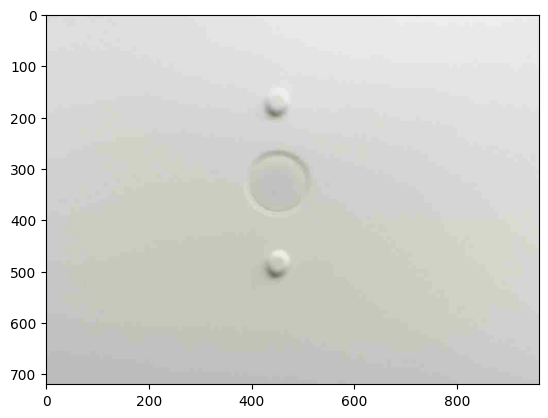

(720, 960, 3)
(32, 720, 960, 3)
(32,)
<PrefetchDataset shapes: ((None, 720, 960, 3), (None,)), types: (tf.float32, tf.int32)>
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 720, 960, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 360, 480, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 360, 480, 32)      4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 180, 240, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 180, 240, 64)      18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 90, 120, 64)       0    

2024-01-24 18:16:22.248941: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2024-01-24 18:16:23.055561: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-24 18:16:24.253938: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


47/47 [==============================] - 14s 192ms/step - loss: 3.1078 - accuracy: 0.5891 - val_loss: 2.0843 - val_accuracy: 0.7181
Epoch 2/10
47/47 [==============================] - 10s 204ms/step - loss: 0.1632 - accuracy: 0.9515 - val_loss: 3.1632e-04 - val_accuracy: 1.0000
Epoch 3/10
47/47 [==============================] - 10s 197ms/step - loss: 5.7132e-05 - accuracy: 1.0000 - val_loss: 6.8463e-05 - val_accuracy: 1.0000
Epoch 4/10
47/47 [==============================] - 9s 184ms/step - loss: 2.2553e-05 - accuracy: 1.0000 - val_loss: 3.5005e-05 - val_accuracy: 1.0000
Epoch 5/10
47/47 [==============================] - 9s 184ms/step - loss: 1.8193e-05 - accuracy: 1.0000 - val_loss: 3.0099e-05 - val_accuracy: 1.0000
Epoch 6/10
47/47 [==============================] - 9s 184ms/step - loss: 9.8489e-06 - accuracy: 1.0000 - val_loss: 1.9366e-05 - val_accuracy: 1.0000
Epoch 7/10
47/47 [==============================] - 9s 183ms/step - loss: 8.9163e-06 - accuracy: 1.0000 - val_loss: 1.15

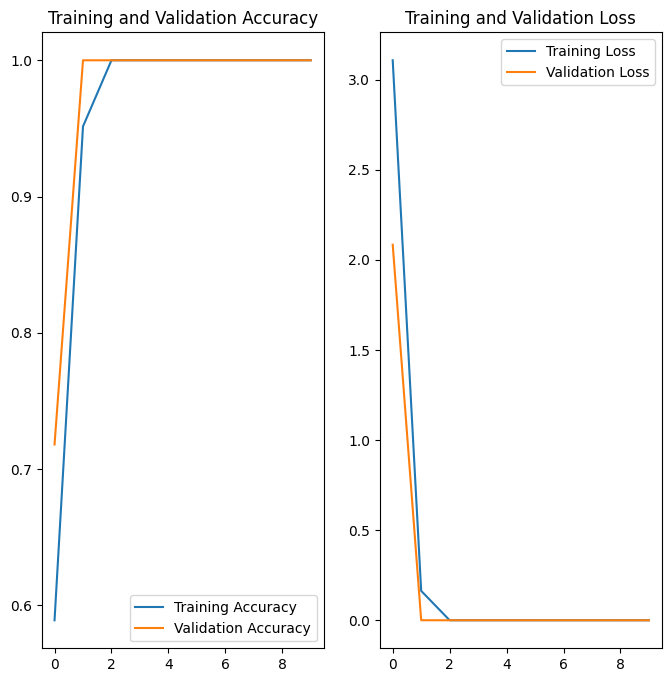

In [12]:
import tensorflow as tf
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
directory = '../cleandata/(3)'
# 원본 이미지 사이즈 확인
image = cv2.imread('../cleandata/(3)/pass/2023-08-31(4).jpeg')
print(image.shape)
Height, Width, Channel = image.shape
# 이미지 정보 불러오기
train_data = utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(Height, Width), # 원래 이미지의 사이즈를 그대로 사용하였음.
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

val_data = utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(Height, Width),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

class_names = train_data.class_names
print(class_names)
# 이미지 실제로 불러와서 확인하기
for images, labels in train_data.take(1):
    image = images[0].numpy().astype("uint8")
    break
plt.imshow(image)
plt.show()
print(image.shape)

# 이미지 배치사이즈 확인하기
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

AUTOTUNE = tf.data.AUTOTUNE
train_data_set = train_data.cache().prefetch(buffer_size=AUTOTUNE)
print(train_data_set)
from tensorflow.keras import layers, Sequential, Input
normalization_layer = layers.Rescaling(1./255)

num_classes = len(class_names)

#######################################

# 1. normalization을 모델 안에 넣는 방법.

model = Sequential([
    layers.Input(shape=(Height, Width, 3)),
    normalization_layer,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

#######################################

# 2. Dataset.map을 사용하는 방법

normalized_train = train_data.map(lambda x, y: (normalization_layer(x), y))
normalized_val = val_data.map(lambda x, y: (normalization_layer(x), y))

image_batch, labels_batch = next(iter(normalized_train))
first_image = image_batch[0]
np.max(first_image)
np.min(first_image)

image_batch, labels_batch = next(iter(normalized_val))
first_image = image_batch[0]
np.max(first_image)
np.min(first_image)


model = Sequential([
  layers.Input(shape=(Height, Width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#######################################

# 3. map을 이용하여 generation과 crop을 하는 방법

def data_augmentation(image, label, max_translation=10):
    # 회전: -10도에서 10도 사이의 무작위 회전
    angle = tf.random.uniform([], minval=-10, maxval=10, dtype=tf.float32)
    image = tf.image.rot90(image, k=tf.cast(angle / 90, tf.int32))

    # 무작위 이동: x와 y 축으로 각각 -10에서 10 사이의 무작위 픽셀 이동
    # 이미지의 형태를 가져옵니다.
    shape = tf.shape(image)
    height, width = shape[0], shape[1]

    # 무작위로 이동할 픽셀 값을 결정합니다.
    dx = tf.random.uniform([], minval=-max_translation, maxval=max_translation, dtype=tf.int32)
    dy = tf.random.uniform([], minval=-max_translation, maxval=max_translation, dtype=tf.int32)

    # 이미지에 패딩을 적용합니다.
    image_padded = tf.image.pad_to_bounding_box(image, max_translation, max_translation, height + max_translation*2, width + max_translation*2)

    # 패딩된 이미지를 잘라내어 원래 크기로 되돌립니다.
    image = tf.image.crop_to_bounding_box(image_padded, max_translation + dy, max_translation + dx, height, width)

    # 밝기 조정: 최대 ±10%의 밝기 조정
    delta = tf.random.uniform([], minval=-0.1, maxval=0.1, dtype=tf.float32)
    image = tf.image.adjust_brightness(image, delta)

    return image, label

def image_crop(image, label):
    # 이미지 크롭 작업 수행
    # 예: 이미지의 일부 영역을 크롭 (예: (400, 400)에서 (600, 700) 영역을 크롭)
    cropped_image = tf.image.crop_to_bounding_box(image, 400, 400, 200, 300)
    return cropped_image, label

# 데이터셋에 이미지 크롭 함수 적용
augmented_train_data = train_data.map(data_augmentation)
cropped_train_data = augmented_train_data.map(image_crop)

#######################################

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

epochs=10
history = model.fit(
  normalized_train,
  validation_data=normalized_val,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()